<a href="https://colab.research.google.com/github/youngcheolman/practice/blob/main/%EA%B0%80%EC%9E%A5_%EC%88%98%EA%B0%95%EC%9D%84_%EB%A7%8E%EC%9D%B4_%ED%95%98%EB%8A%94_%EC%A7%80%EC%97%AD%EC%9D%84_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EC%9C%BC%EB%A1%9C_%EC%B0%BE%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

목표 = 가장 수강을 많이 하는 지역을 데이터분석으로 찾기

In [1]:
import pandas as pd
df = pd.read_csv('students_area_detail.csv')
df.head()

,lecture_id,area,latitude,longitude,user_id
0,5f2cfa581c0c783e4e825379,부산,35.179554,129.075642,78ff837c7cea9f33
1,5f35370cf9b9ed3dee7f1b73,대전,36.348315,127.390594,2987aa87d23c9e3d
2,5f266927e67b8fcf4340c1464,서울,37.487935,126.857758,23182525e9996864
3,5f35370cf9b9ed3dee7f1b6a,부산,35.179554,129.075642,ffb6913842d617a5
4,5f266927e67b8fcf4340c1705,서울,37.487935,126.857758,2c6822e7e833dc95


In [2]:
#지역 데이터 확인
category_range = set(df['area'])
print(category_range, len(category_range))

{'세종', '전북', '경기', '강원', '제주', '대전', '충북', '서울', '부산', '광주', '경북', '경남'} 12


In [3]:
#목표에 맞는 새로운 테이블을 만들기
area_info = df[['area','latitude','longitude']]
area_info.head()

,area,latitude,longitude
0,부산,35.179554,129.075642
1,대전,36.348315,127.390594
2,서울,37.487935,126.857758
3,부산,35.179554,129.075642
4,서울,37.487935,126.857758


In [4]:
#drop_duplicates() = area 컬럼의 중복 데이터를 처리
area_info = area_info.drop_duplicates(['area'])
area_info = area_info.reset_index(drop = True)
area_info

,area,latitude,longitude
0,부산,35.179554,129.075642
1,대전,36.348315,127.390594
2,서울,37.487935,126.857758
3,전북,35.574683,126.852264
4,광주,36.084621,126.951141
5,경기,37.546755,127.203827
6,강원,37.531510,129.000000
7,세종,36.560000,127.278000
8,경북,36.129002,128.343658
9,경남,35.556809,129.247284


In [5]:
#지역별 총 학생 수
number_of_students = pd.DataFrame(df.groupby('area')['user_id'].count())
number_of_students

,user_id
area,
강원,261
경기,804
경남,79
경북,85
광주,565
대전,1238
부산,1162
서울,5296
세종,446


In [6]:
#merge()를 이용하여, 두 테이블을 병합 할수 있어요 :)!
result = pd.merge(area_info, number_of_students, on="area")
result

,area,latitude,longitude,user_id
0,부산,35.179554,129.075642,1162
1,대전,36.348315,127.390594,1238
2,서울,37.487935,126.857758,5296
3,전북,35.574683,126.852264,160
4,광주,36.084621,126.951141,565
5,경기,37.546755,127.203827,804
6,강원,37.531510,129.000000,261
7,세종,36.560000,127.278000,446
8,경북,36.129002,128.343658,85
9,경남,35.556809,129.247284,79


In [7]:
import matplotlib.pyplot as plt
import numpy as np
plt.rc('font', family='NanumBarunGothic') #한글 깨짐을 방지시켜줘요!

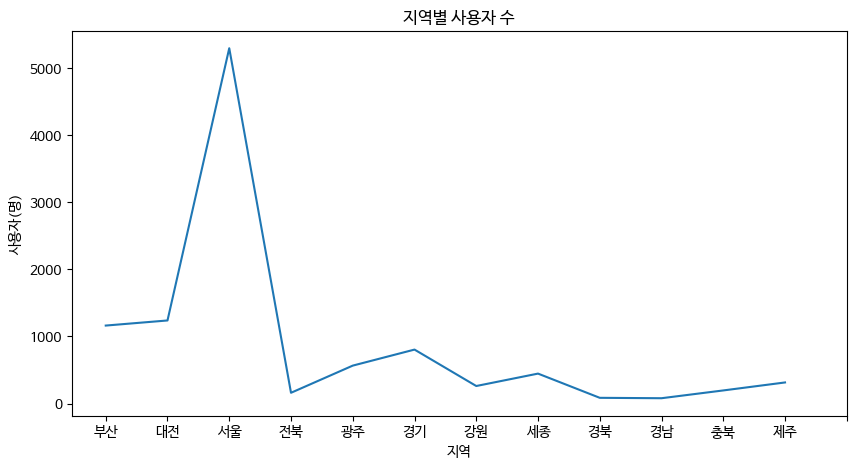

In [8]:
#그래프 사이즈 변경
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.plot(result['area'], result['user_id'])

#그래프 명
plt.title('지역별 사용자 수')

#그래프 x축 레이블
plt.xlabel('지역')

#그래프 y축 레이블
plt.ylabel('사용자(명)')

#x축 눈금 수
plt.xticks(np.arange(13))

#그래프 출력
plt.show()

In [25]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [9]:
#지도에 표기하기
import folium
from folium.plugins import MarkerCluster

#한국 위도 경도 설정하기
m = folium.Map(location=[37.5536067,126.9674308],
               zoom_start=11)
m

In [10]:
#반복문 활용하여 지도에 수강생 분포 그리기

for n in result.index:
  radius = result.loc[n,'user_id']
	#loc[n,"열 이름"]  => loc[]를 활용하여 n번째의 열을 조회 가능
	#즉, n번째의 user의 수를 가져 올수 있다
  folium.CircleMarker([result['latitude'][n],result['longitude'][n]],
                        radius = radius/50, fill=True).add_to(m)
	#.add_to(m)를 활용하여, 지정해 두었던 우리나라의 지도를 가져올 수 있다
m

서울 지역에서 수강생의 수 가장 많았고, 다음으로는 대전, 부산 지역 순으로 수강생이 많이 분포한 것을 알 수 있었다.